# 22k-4080 (BAI-7B)
# preprocessing the CIFAR 10 dataset (Example 2-1)

In [4]:
import numpy as np
from tensorflow.keras import datasets, utils

# 1) Load the CIFAR-10 dataset.
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
NUM_CLASSES = 10

# 2) Scale each image so that the pixel channel values lie between 0 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3) One-hot encode the labels.
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

print(f"x_train shape: {x_train.shape} (Expected: [50000, 32, 32, 3])")
print(f"x_test shape: {x_test.shape} (Expected: [10000, 32, 32, 3])")
print(f"y_train shape: {y_train.shape} (Expected: [50000, 10])")
print(f"y_test shape: {y_test.shape} (Expected: [10000, 10])")

x_train shape: (50000, 32, 32, 3) (Expected: [50000, 32, 32, 3])
x_test shape: (10000, 32, 32, 3) (Expected: [10000, 32, 32, 3])
y_train shape: (50000, 10) (Expected: [50000, 10])
y_test shape: (10000, 10) (Expected: [10000, 10])


# Example 2-11. Displaying predictions of the MLP against the actual labels

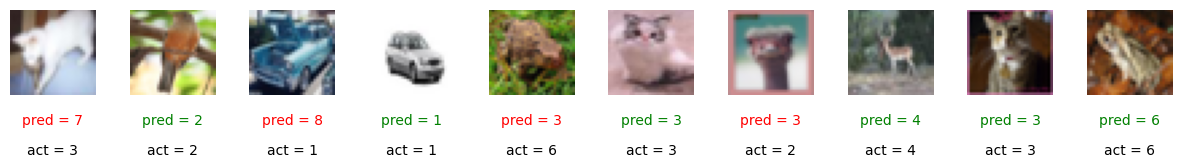

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, utils

(x_train, y_train_cat), (x_test, y_test_cat) = datasets.cifar10.load_data()
NUM_CLASSES = 10
x_test = x_test.astype('float32') / 255.0

# 1. Create actual labels (single integer)
# y_test_cat is the original integer label array of shape [10000, 1]
actual_single = y_test_cat.flatten()

# 2. Simulate predictions (as if a model was run)
# We simulate a 20% error rate for demonstration purposes.
preds_single = actual_single.copy()
n_errors = int(0.2 * len(x_test))
error_indices = np.random.choice(len(x_test), size=n_errors, replace=False)

for idx in error_indices:
    # Assign a random INCORRECT class label
    original_class = preds_single[idx]
    new_class = np.random.randint(NUM_CLASSES)
    while new_class == original_class:
        new_class = np.random.randint(NUM_CLASSES)
    preds_single[idx] = new_class

n_to_show = 10
# Select random indices without replacement
indices = np.random.choice(range(len(x_test)), n_to_show, replace=False)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')

    # Determine text color: Green for correct, Red for incorrect
    color = 'green' if preds_single[idx] == actual_single[idx] else 'red'

    # Display Prediction
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes, color=color)

    # Display Actual Label
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)

    # Display Image
    ax.imshow(img)

plt.show()

# Example (2-12 to 2-16)

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# --- Example 2-13 and 2-14 ---
# The models below demonstrate the use of Conv2D and BatchNormalization.
# The grayscale input example (64, 64, 1) is a simple layer demonstration,
# while the full CNN below (32, 32, 3) is a complete working model structure.

# Example 2-16: Code to build a comprehensive CNN model using Keras

# Define the input layer shape (for CIFAR-10 images: 32x32 pixels, 3 color channels)
input_layer = layers.Input(shape=(32, 32, 3), name='input_image')

# --- Convolutional Blocks ---


x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='conv_1')(input_layer)
x = layers.BatchNormalization(name='bn_1')(x)
x = layers.LeakyReLU(name='relu_1')(x)
# Downsample
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', name='conv_2_downsample')(x)
x = layers.BatchNormalization(name='bn_2')(x)
x = layers.LeakyReLU(name='relu_2')(x)

# Block 2
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', name='conv_3')(x)
x = layers.BatchNormalization(name='bn_3')(x)
x = layers.LeakyReLU(name='relu_3')(x)
# Downsample
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', name='conv_4_downsample')(x)
x = layers.BatchNormalization(name='bn_4')(x)
x = layers.LeakyReLU(name='relu_4')(x)


# Flatten the feature maps for the fully connected layers
x = layers.Flatten(name='flatten')(x)

# Dense Layer 1
x = layers.Dense(128, name='dense_1')(x)
x = layers.BatchNormalization(name='bn_5')(x)
x = layers.LeakyReLU(name='relu_5')(x)

# Dropout for regularization
x = layers.Dropout(rate=0.5, name='dropout_1')(x)

# Output Layer (10 classes, using softmax for classification)
output_layer = layers.Dense(10, activation='softmax', name='output_softmax')(x)

# Instantiate the full model
model = models.Model(inputs=input_layer, outputs=output_layer, name='CNN_Example_2_16')
model.summary()

Model: "CNN_Example_2_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_1 (BatchNormalization)       │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1 (LeakyReLU)              │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_downsample (Conv2D)      │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_2 (BatchNormalization)       │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2 (LeakyReLU)              │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_3 (BatchNormalization)       │ (None, 16, 16, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_3 (LeakyReLU)              │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4_downsample (Conv2D)      │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_4 (BatchNormalization)       │ (None, 8, 8, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_4 (LeakyReLU)              │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_5 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_5 (LeakyReLU)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)